In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
from opto_untils import makedirs
from plot_untils import shiftedColorMap
# load signal processing functions
from scipy.signal import butter, filtfilt

colors = ["blue", "white", "red"]
b_w_r_cmap = LinearSegmentedColormap.from_list("b_w_r", colors)

In [2]:
def make_combine_folder(exp_name):
    # Create a new folder to store combined files
    scratch_dir = '/root/capsule/scratch'
    combined_folder_path = os.path.join(scratch_dir, exp_name)
    wf_figs_path = os.path.join(combined_folder_path, 'waveform_figs')
    wf_combined_info_path = os.path.join(combined_folder_path, 'waveform_combined_info')
    if not os.path.exists(combined_folder_path):
        os.makedirs(combined_folder_path)
    combined_dirs = {
        'combined_folder_path': combined_folder_path,
        'wf_figs_path': wf_figs_path,
        'wf_combined_info_path': wf_combined_info_path
    }
    makedirs(combined_dirs)
    return combined_dirs

In [3]:
combined_dirs = make_combine_folder('all_wf_NP2.0') 
combined_all_wf = pd.read_pickle(os.path.join(combined_dirs['combined_folder_path'], 'combined_all_wf.pkl'))

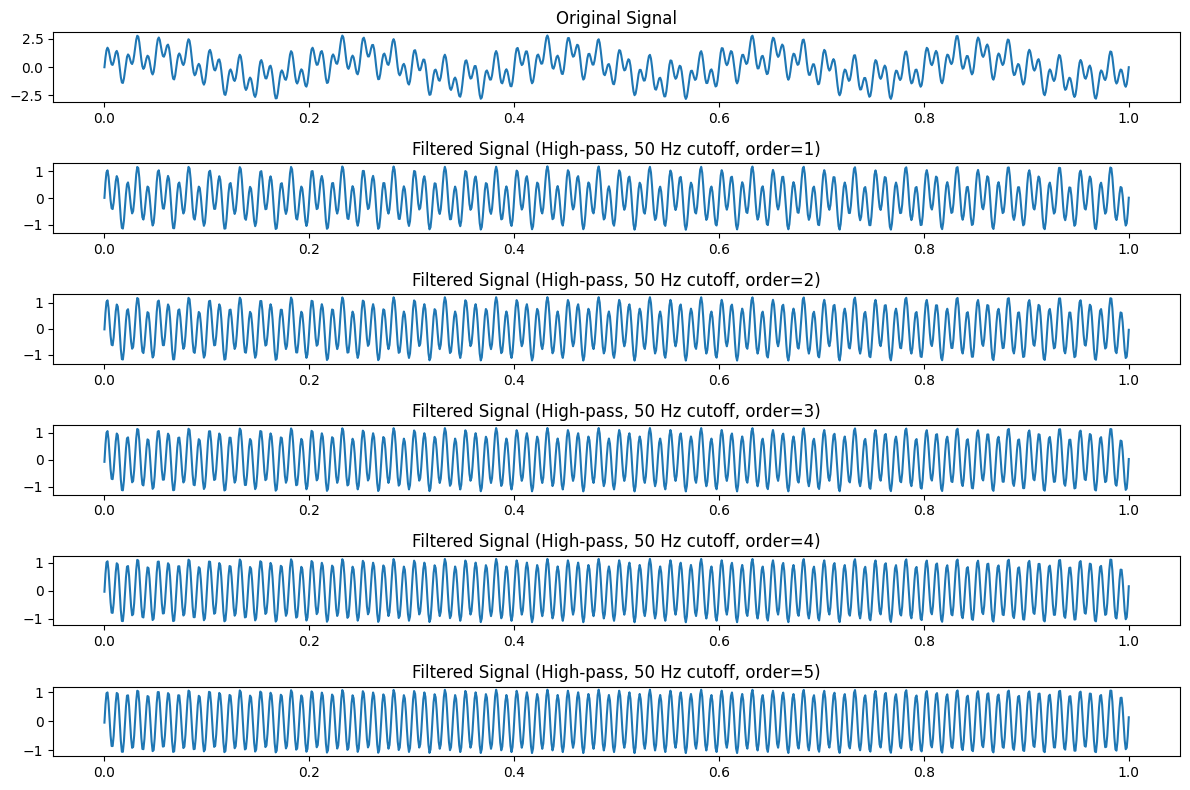

In [10]:
# Example parameters
fs = 1000  # Sampling frequency in Hz
cutoff = 50  # High-pass cutoff frequency in Hz

# Generate a sample signal (a mix of 5 Hz and 100 Hz components)
t = np.linspace(0, 1.0, fs)
signal = np.sin(2*np.pi*5*t) + np.sin(2*np.pi*100*t) + np.sin(2*np.pi*40*t)

# Step 1: Design a Butterworth high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high')  # High-pass filter
    return b, a

# Step 2: Apply the filter
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)  # Apply filter in both directions (zero-phase)
    return y


# Plot the original and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(6, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
for order in range(1,6):
    plt.subplot(6, 1, order + 1)
    filtered_signal = highpass_filter(signal, cutoff, fs, order=order)
    plt.plot(t, filtered_signal)
    plt.title(f'Filtered Signal (High-pass, {cutoff} Hz cutoff, order={order})')

plt.tight_layout()
plt.show()
